<a href="https://colab.research.google.com/github/CBDRH-HDAT9500/Solutions-week01-05/blob/main/Week01-Exercise02-Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://github.com/CBDRH-HDAT9500/Solutions-week01-05/blob/main/images/HDAT9500Banner.PNG?raw=1)
<br>
© Copyright The University of New South Wales - CRICOS 00098G

# Week 1: Introduction to ML and Data Mining: Data Visualisation using 'plotnine' library

# Introduction:

As we could see in the first exercise of this chapter, we visualise our features using the 'matplotlib' and 'seaborn' libraries. However, the **'plotnine'** library is also used for data visualisation in Python.

The **plotnine** library is based on the R package ggplot2. There are some minor changes with respect to the R version, but fortunately, not many.

Tutorials:
1. How to install plotnine: http://plotnine.readthedocs.io/en/stable/installation.html
2. API: http://plotnine.readthedocs.io/en/stable/api.html

In this notebook, we will use the library <b>plotnine</b> to visualise the <b> diabetes hospitalisations - inpatient hospital data set </b> that we are going to use throughout the course. That is, we will repeat only the steps 5.4 and 5.5 of Chapter 1, Exercise 1.

## Aims
 1. To become familiar with 'plotnine' library
 2. To use **'plotnine'** to visualise and explore our data set, in particular, how our input data are related to the output.


In [ ]:
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [ ]:
import numpy as np
from scipy import sparse
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# 1. Docstring

Create a docstring with the variables and constants that you will use in this exercise (data dictionary) and the purpose of your program. It is expected that you choose informative variable names and document your program (both docstrings and comments).

<b> Write the answer here:</b>
#####################################################################################################################

(double-click here)


#####################################################################################################################

# 2. Load the data set

We import our dataset and print it. Please note that we will use the same dataset used in Chapter 1, Exercise 1.

The data dictionary is located in: **'data/diabetes/Data_Dictionary.pdf'**

In [ ]:
import pickle

with open('hospital.pickle', 'rb') as data:
   hospital = pickle.load(data)

In [ ]:
# Print the number of rows and columns using 'DataFrame.shape':
print("Number of rows and columns: ",hospital.shape)
hospital.head()

Number of rows and columns:  (69276, 21)


,los,Age,sex,payer_code,medical_specialty,max_glu_serum,A1Cresult,number_diagnoses,num_lab_procedures,num_procedures,...,number_emergency,number_inpatient,number_outpatient,group_name_1,group_name_2,group_name_3,readmission,admission_type_id_cat,discharge_disposition_id_cat,admission_source_id_cat
0,2,79,Female,?,?,None,None,9,38,0,...,0,0,0,Other,Endocrine,Infectious,no,3,18,7
1,5,59,Male,?,Pulmonology,None,>8,8,49,0,...,0,0,0,Endocrine,Cardiac_&_circulatory,Other,no,3,1,7
2,2,33,Female,MD,?,None,None,5,62,0,...,1,0,1,Other,Endocrine,Cardiac_&_circulatory,no,3,1,7
3,6,42,Female,?,?,None,None,9,77,0,...,0,0,0,Infectious,Respiratory,Endocrine,no,3,6,7
4,1,62,Male,?,Cardiology,None,None,7,13,5,...,0,0,0,Cardiac_&_circulatory,Cardiac_&_circulatory,Cardiac_&_circulatory,no,3,1,7


In [ ]:
hospital.dtypes

los                                int64
Age                                int64
sex                             category
payer_code                      category
medical_specialty                 object
max_glu_serum                   category
A1Cresult                       category
number_diagnoses                   int64
num_lab_procedures                 int64
num_procedures                     int64
num_medications                    int64
number_emergency                   int64
number_inpatient                   int64
number_outpatient                  int64
group_name_1                    category
group_name_2                    category
group_name_3                    category
readmission                       object
admission_type_id_cat           category
discharge_disposition_id_cat    category
admission_source_id_cat         category
dtype: object

# 3. Visualisation of the outcome variable: 'Readmission'

As mentioned in the previous exercise, our final goal is: to build a predictive algorithm to predict if a patient with diabetes will be readmitted to the hospital after discharge. That is, **'readmission'** is our outcome variable.

**Let's visualise the outcome variable to have a better idea of the differences between both classes, 'Yes' and 'No'.**

For this, we will use 'ggplot' from **plotnine** library. More information: https://plotnine.readthedocs.io/en/stable/api.html

In [ ]:
from plotnine import *
import grid                 # Please make sure to install grid in anaconda prompt using this command: 'pip install grid'

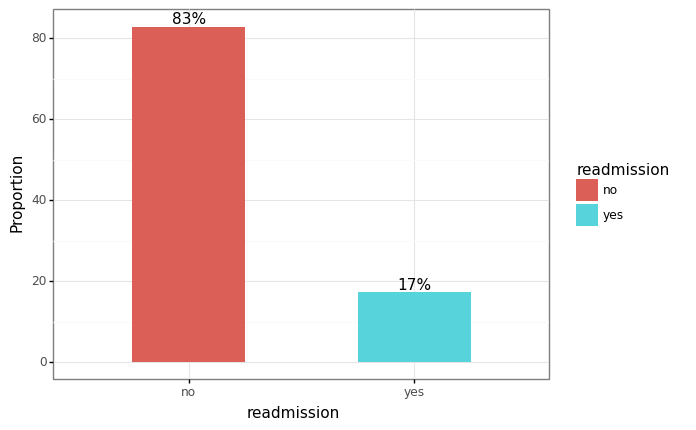

<ggplot: (167484248317)>

In [ ]:
# Plot value counts with labels including proportions for each class of 'readmission'
p = ggplot(aes(x='readmission', y=('100*..count../sum(..count..)'), fill='readmission'), data=hospital)
p = p + geom_bar(width=0.5) + ylab('Proportion') + theme_bw()
p + geom_text(aes(label='stat(prop)*100', group=1),stat='count',nudge_y=0.125,va='bottom',format_string='{:.0f}%')

# 4. Visualising the features regarding "readmission"

## 4.1. Continuous Numeric Variables by Readmission

Lets look at how the continuous numeric variables are distributed regarding **readmission**. For this, we will use 'geom_hist()' from ggplot function. More information: https://plotnine.readthedocs.io/en/stable/api.html

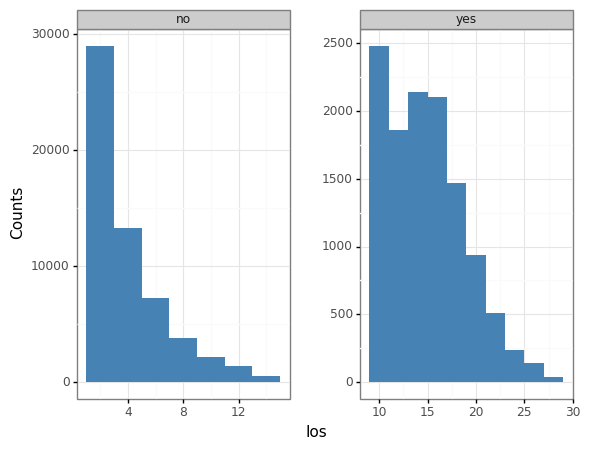

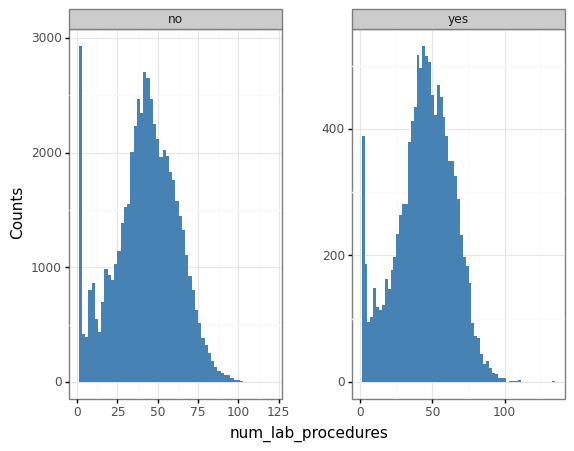

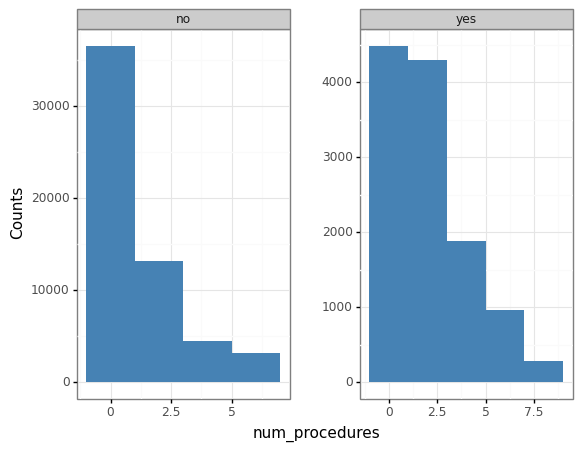

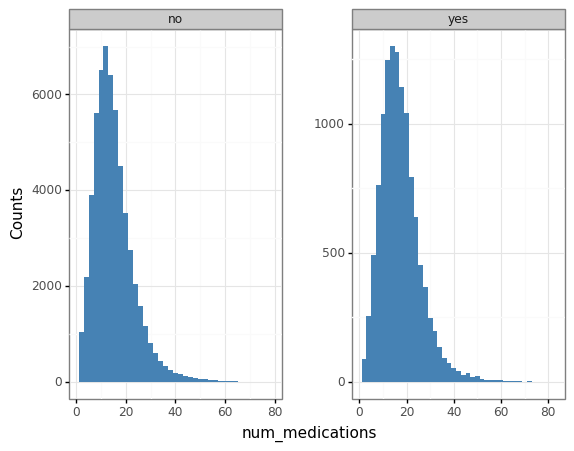

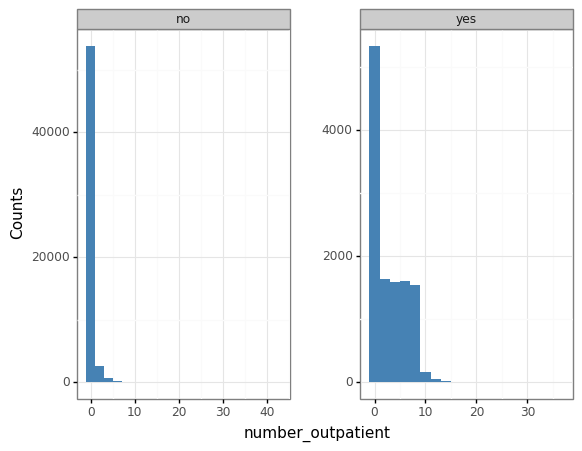

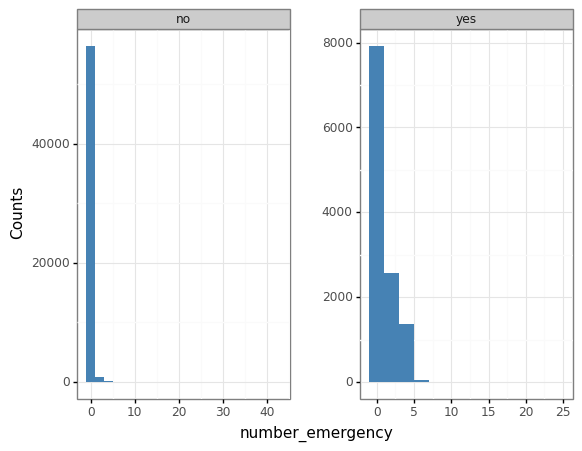

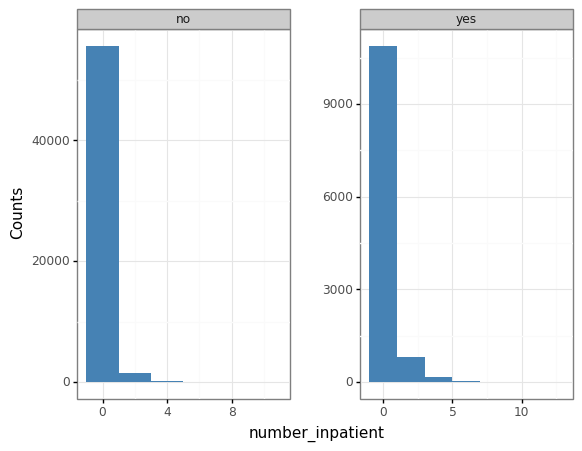

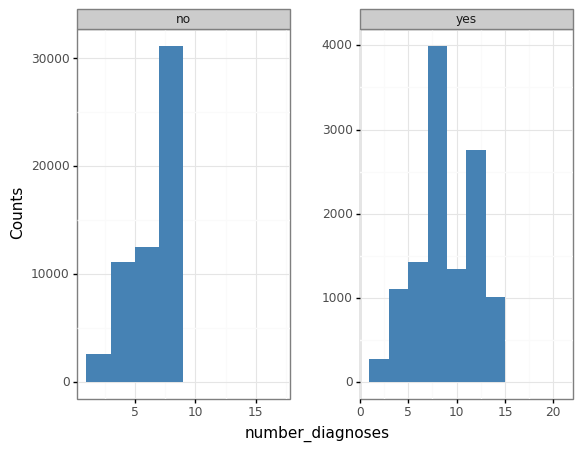

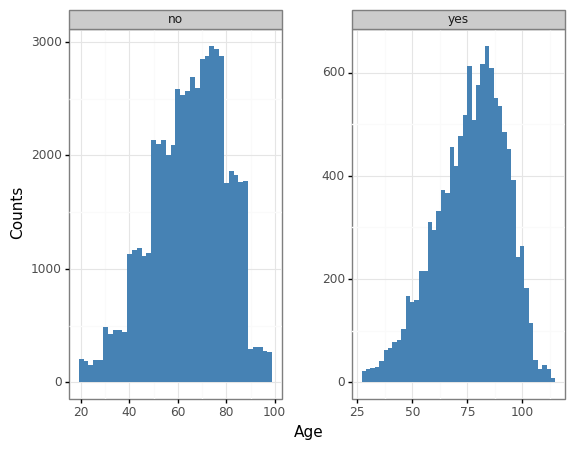

In [ ]:
continuous_variables = ['los', 'num_lab_procedures','num_procedures','num_medications',
                        'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses','Age']

for i in continuous_variables:
    p = ggplot(hospital, aes(x=i))
    p = p + geom_histogram(binwidth = 2, fill = 'steelblue') + facet_wrap('~readmission', scales="free")
    p = p + ylab('Counts') + theme_bw() + theme(panel_spacing=.70)
    print(p)

### **Lets create box plots to visualise the same variables by readmission**

For this, we will use the same selection of variables defined abive 'continuous_variables'.

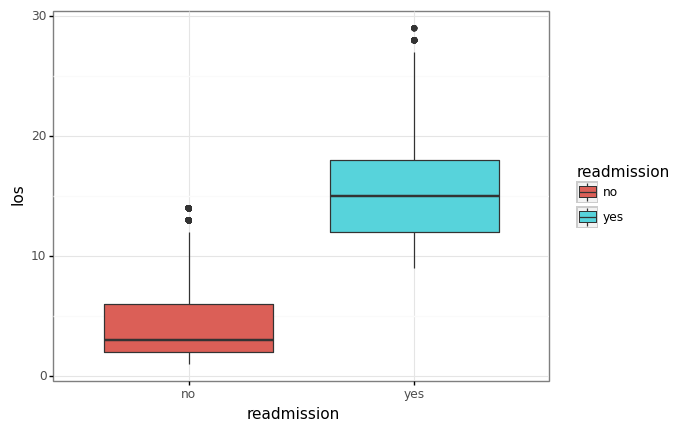

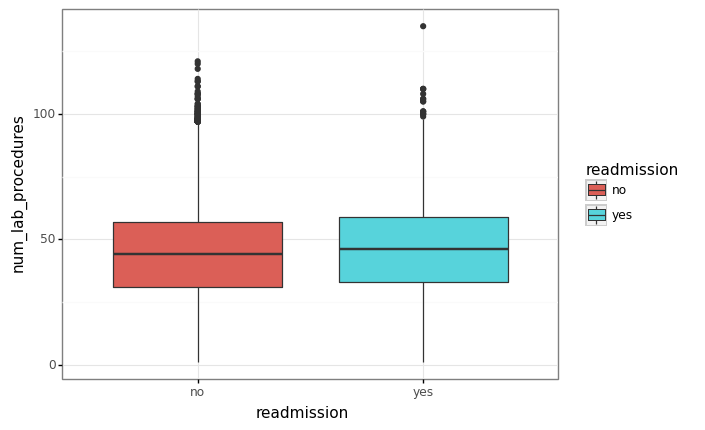

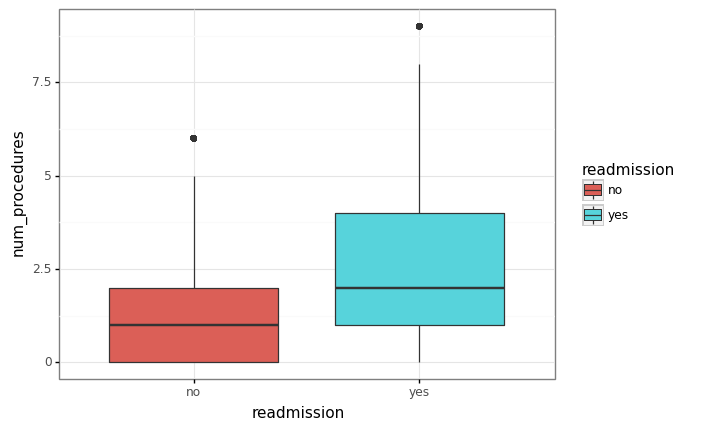

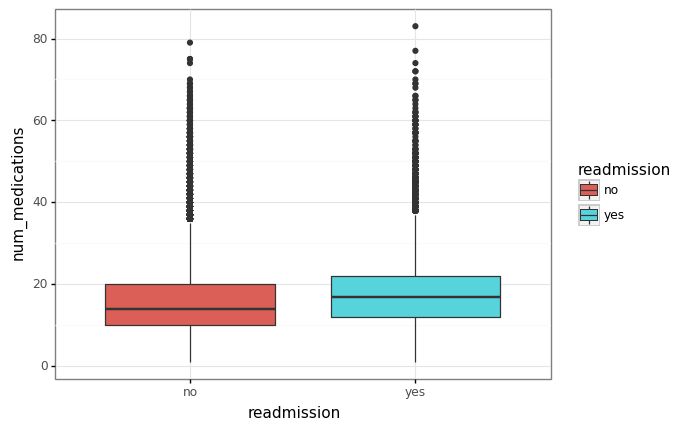

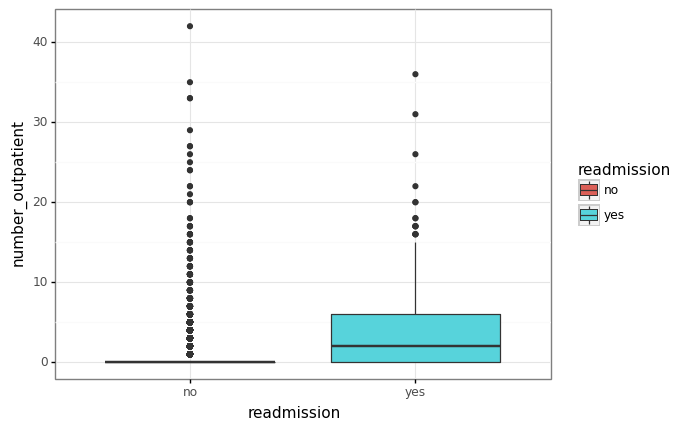

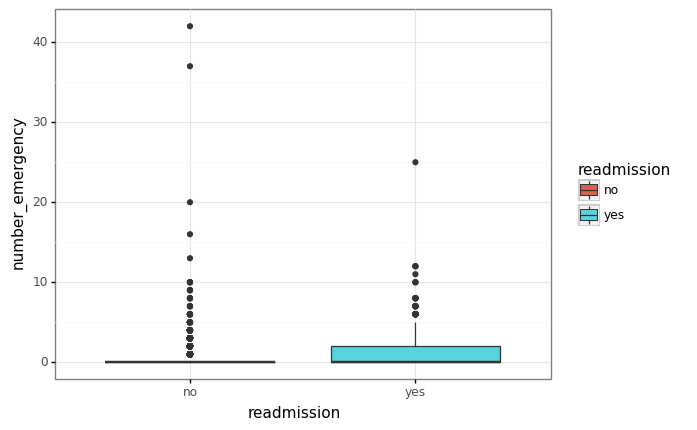

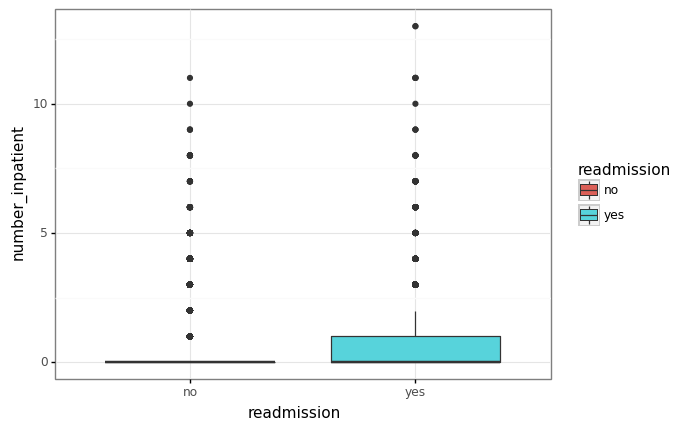

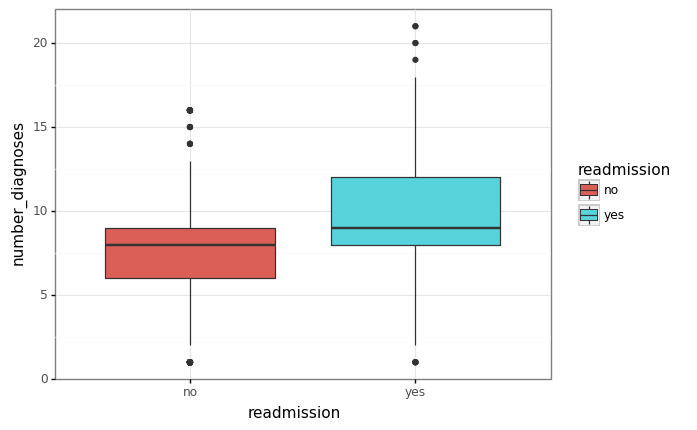

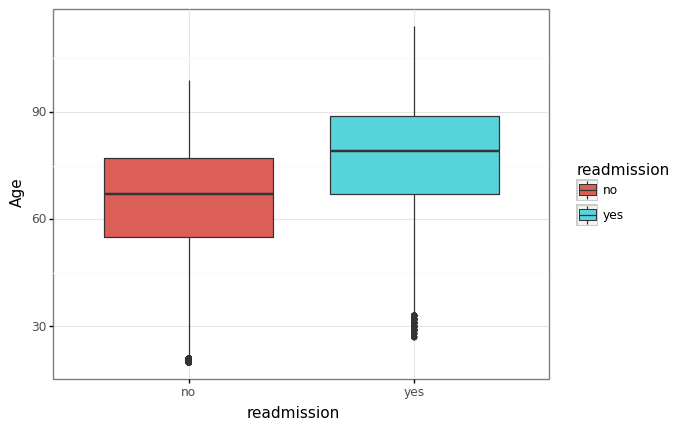

In [ ]:
# Box plot of all the continuous/numeric variables regarding 'readmissions'. Python command: ggplot()+geom_boxplot()
for i in continuous_variables:
    p = ggplot(hospital, aes(x='readmission', y=i, fill='readmission'))
    p = p + geom_boxplot() + theme_bw()
    print(p)

## 4.2 Categorical variables by readmission:

Let's plot the categorical variables recorded in our dataset, focusing on our output: 'readmission'.

In this case, we will use **'geom_bar()'** instead of 'geom_hist()'. A histogram shows the distribution of a continuous numeric variable by grouping ranges of the data into bins. Bar charts plot categorical data.

Selecting variables needed for our plots. Make sure you delete from the list below the variables you dropped from the dataset in Exercise01.

In [ ]:
categorical_variables = ['sex','payer_code','max_glu_serum','A1Cresult','admission_type_id_cat','discharge_disposition_id_cat','admission_source_id_cat',
                        'group_name_1', 'group_name_2', 'group_name_3','medical_specialty']


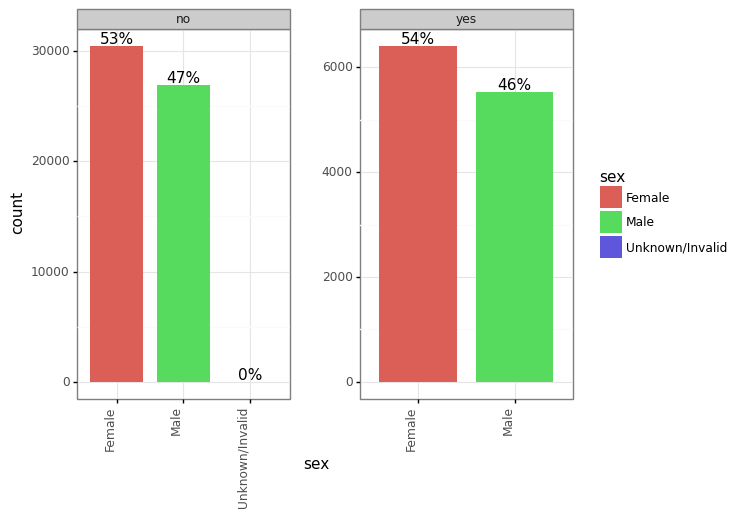

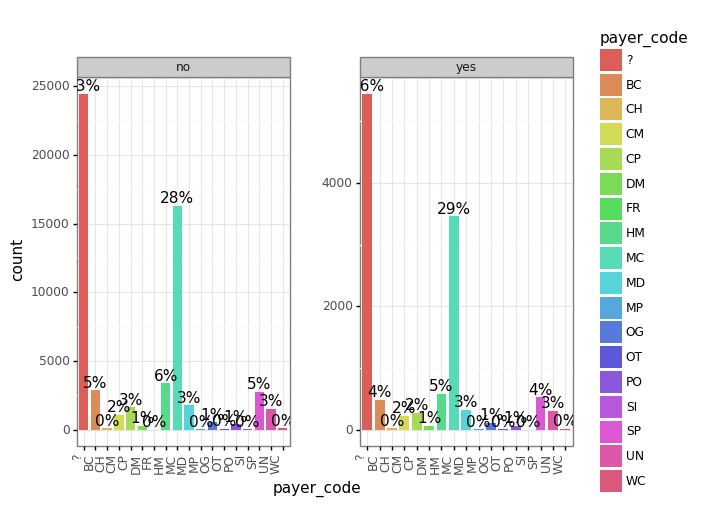

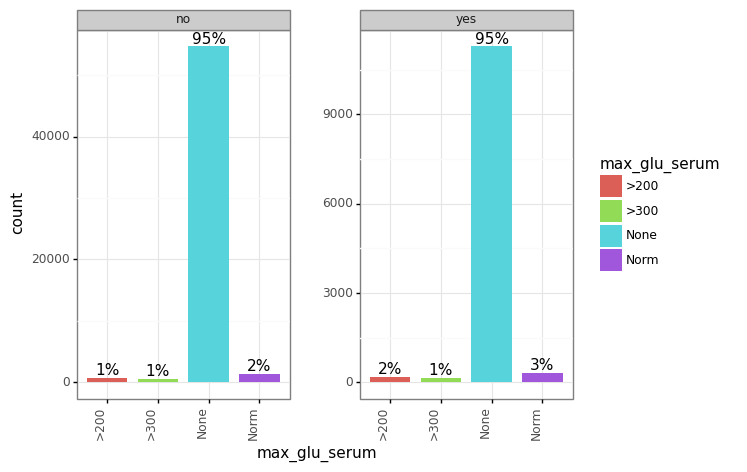

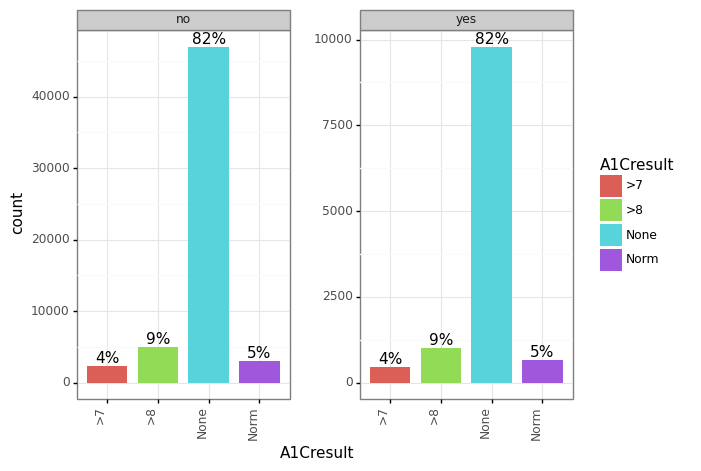

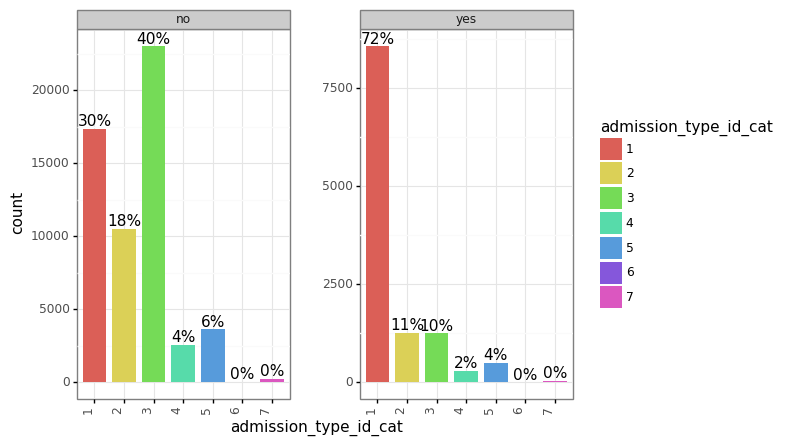

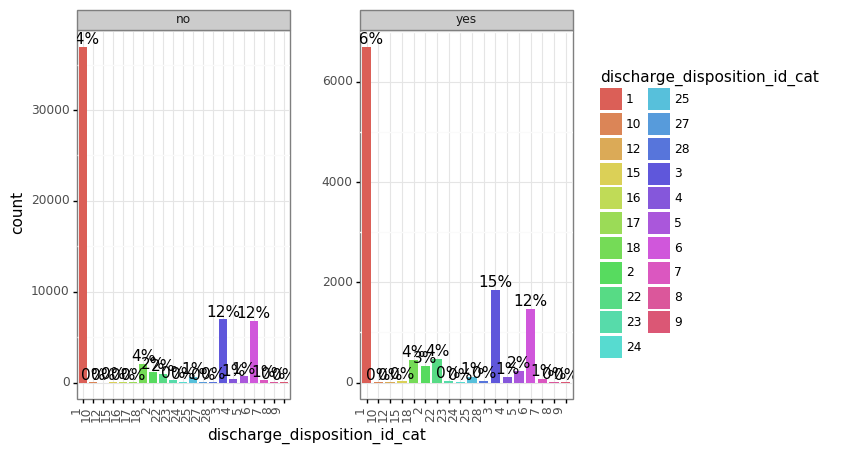

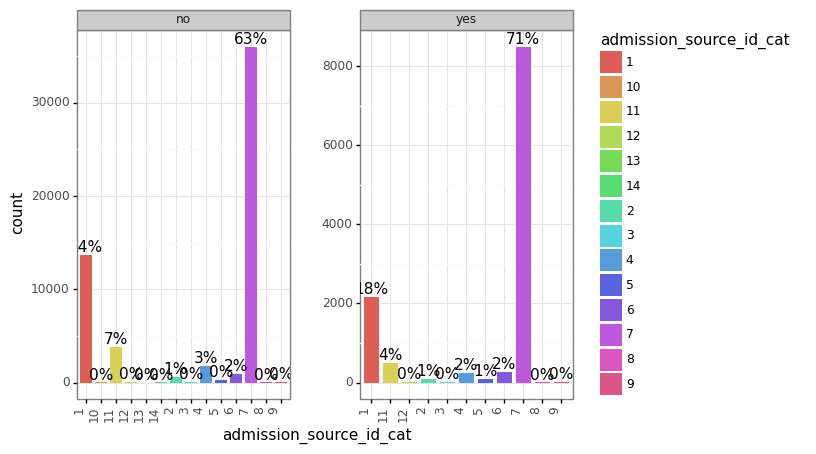

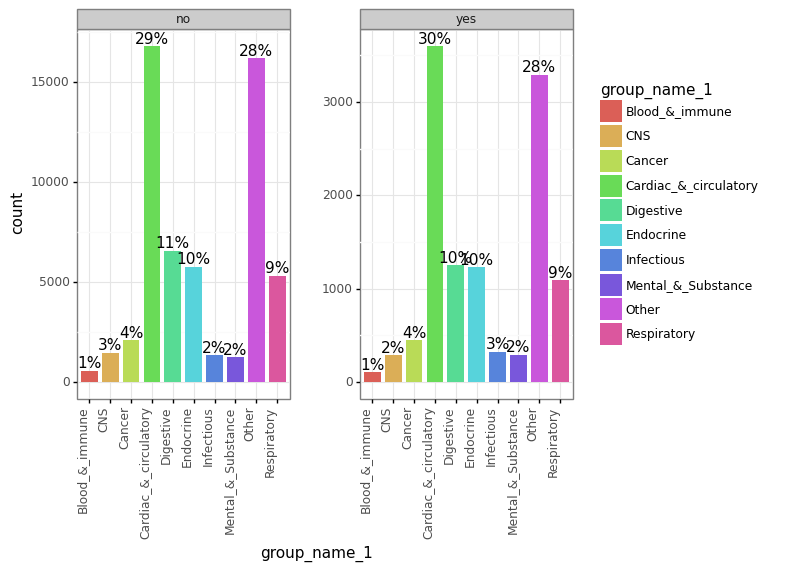

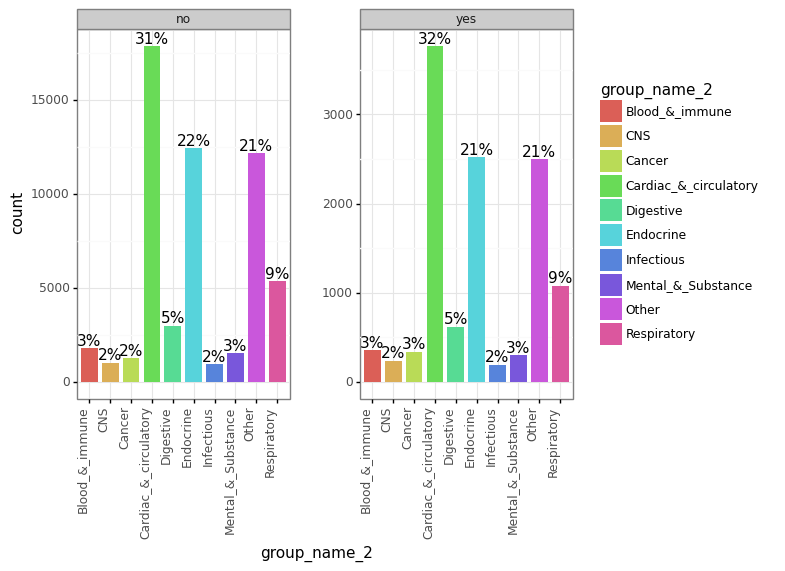

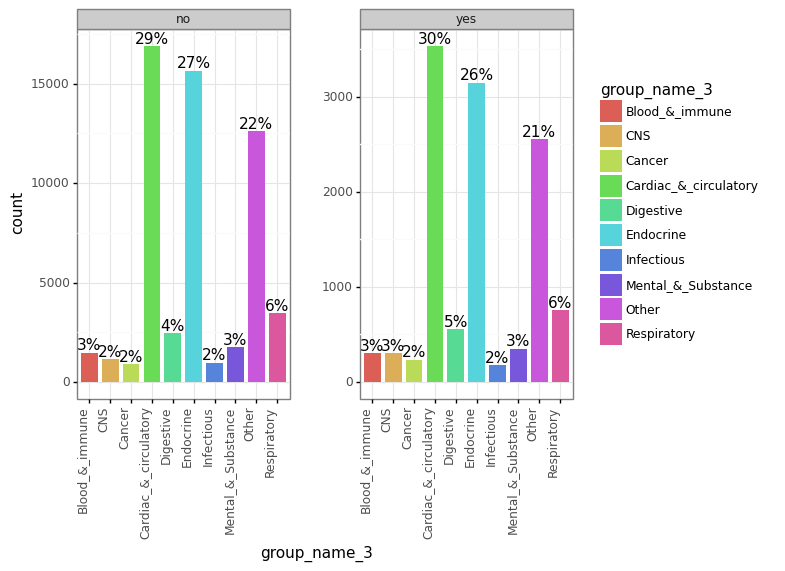

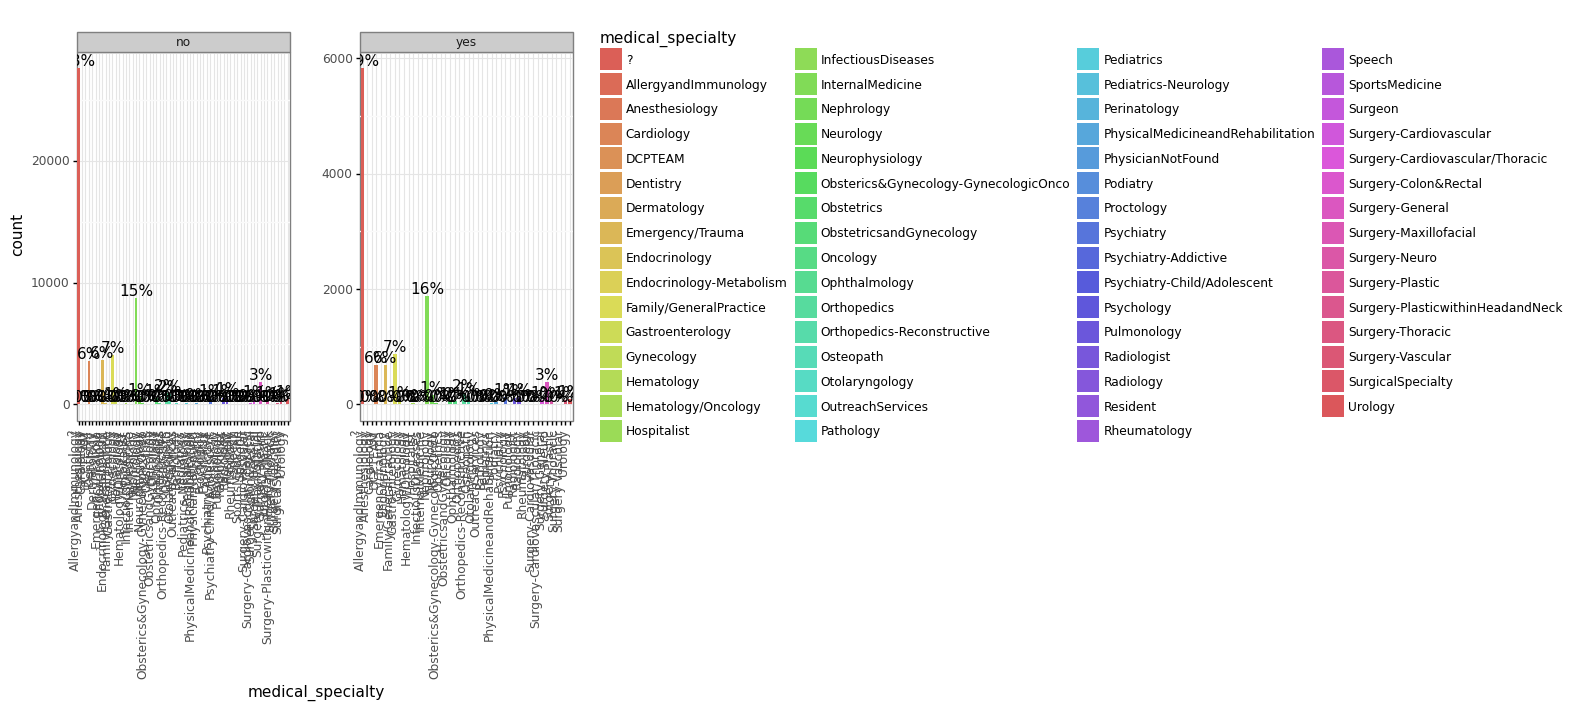

In [ ]:
# 'medical_specialty': it has too many categories to be properly visualised;
# Plot value counts and add labels with percentages in the same graph

for i in categorical_variables:
    p = ggplot(aes(x=i, fill=i), data=hospital) + geom_bar(width=0.8)
    p = p + geom_text(aes(label='stat(prop)*100', group=1),stat='count',nudge_y=0.125,va='bottom',format_string='{:.0f}%')
    p = p + theme_bw() + theme(axis_text_x  = element_text(angle = 90, hjust = 1), panel_spacing=.70)
    p = p + facet_wrap('~readmission', scales='free')
    print(p)

As we could see, we can plot the value counts of all our features and add labels with the proportions on each bar. To see more examples of **'plotnine'** and 'ggplot', please see: https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/

# 5. Summary of exercise

In this notebook, we could see different applications of **'ggplot'**, by using the library **'plotline'**. For example, we learned how to visualise continuous and categorical variables using histograms, box plots and bar plots. In addition, we applied the function 'facet_wrap', which allowed us to observe our features regarding each class of the outcome variable: 'readmissions'.

In conclusion, for data visualisation in Python, which is the step 2 of the machine learning and data mining work-flow, we can use the following libraries:
1. **matplotlib** (Example: Chapter 1, exercise 1)
2. **seaborn** (Example: Chapter 1, exercise 1)
3. **plotnine** (Example: Chapter 1, exercise 2)

More information: https://plotnine.readthedocs.io/en/stable/api.html